# Gauge widening in curves of Malmbanan.

We start by reading data from all the bandelar 111, 113, 116-119 with filenames in the form of RPM Rälslitage i kurva_111.csv. We then combine them into one dataframe.

In [1]:
import pandas as pd
import glob

# Step 1: Define the file path and pattern
file_pattern = "RPM Rälslitage i kurva_*.csv"

# Step 2: Read all files matching the pattern
file_list = glob.glob(file_pattern)

# Step 3: Create a dictionary to store DataFrames
dataframes = {}

for file in file_list:
    try:
        # Extract a unique key for each DataFrame (e.g., from the filename)
        key = file.split("_")[-1].replace(".csv", "")  # Extract part of the filename for identification
        # Read the CSV file into a DataFrame with ; as the delimiter
        df = pd.read_csv(file, delimiter=';', encoding='ISO-8859-1')  # Adjust encoding if needed
        # Store the DataFrame in the dictionary
        dataframes[key] = df
        print(f"Successfully loaded {file} into DataFrame with key '{key}'")
    except Exception as e:
        print(f"Error reading {file}: {e}")

Successfully loaded RPM Rälslitage i kurva_111.csv into DataFrame with key '111'
Successfully loaded RPM Rälslitage i kurva_113.csv into DataFrame with key '113'
Successfully loaded RPM Rälslitage i kurva_116.csv into DataFrame with key '116'
Successfully loaded RPM Rälslitage i kurva_117.csv into DataFrame with key '117'
Successfully loaded RPM Rälslitage i kurva_118.csv into DataFrame with key '118'
Successfully loaded RPM Rälslitage i kurva_119.csv into DataFrame with key '119'


In [2]:
dataframes["111"].head().T

,0,1,2,3,4
Bandel,111,111,111,111,111
Startläge,"1541 + 604,0 m","1436 + 946,0 m","1538 + 92,0 m","1480 + 786,0 m","1477 + 245,0 m"
Slutläge,"1541 + 899,0 m","1436 + 981,0 m","1538 + 622,0 m","1481 + 135,86 m","1477 + 717,0 m"
Spårnamn,E,E,E,E,E
Event Category,RPM Rälslitage i kurva,RPM Rälslitage i kurva,RPM Rälslitage i kurva,RPM Rälslitage i kurva,RPM Rälslitage i kurva
...,...,...,...,...,...
Medel Sidoslitage,NaN,NaN,NaN,NaN,NaN
Medel H,NaN,NaN,NaN,NaN,NaN
Medel Höjdslitage,NaN,NaN,NaN,NaN,NaN
Radie (meter),NaN,NaN,NaN,NaN,NaN


In [3]:
columns_to_keep = [
    "Bandel",
    "Startläge",
    "Slutläge",
    "Spårnamn",
    "Start Date",
    "End Date",
    "Day Age",
    "Radie",
    "Medel Spårvidd Cirkulärkurva",
    "Mätning Spårvidd"
]

for key, df in dataframes.items():
    try:
        # Keep only the specified columns
        dataframes[key] = df[columns_to_keep]
        print(f"Filtered columns for DataFrame with key '{key}'")
    except KeyError as e:
        print(f"Missing columns in DataFrame with key '{key}': {e}")

Filtered columns for DataFrame with key '111'
Filtered columns for DataFrame with key '113'
Filtered columns for DataFrame with key '116'
Filtered columns for DataFrame with key '117'
Filtered columns for DataFrame with key '118'
Filtered columns for DataFrame with key '119'


In [4]:
# Combine all DataFrames in the dictionary into a single DataFrame
try:
    combined_dataframe = pd.concat(dataframes.values(), ignore_index=True)
    print("Successfully combined all DataFrames into one.")
except Exception as e:
    print(f"Error combining DataFrames: {e}")

Successfully combined all DataFrames into one.


In [5]:
combined_dataframe

,Bandel,Startläge,Slutläge,Spårnamn,Start Date,End Date,Day Age,Radie,Medel Spårvidd Cirkulärkurva,Mätning Spårvidd
0,111,"1541 + 604,0 m","1541 + 899,0 m",E,150727 00:00,150927 00:00,3382,583,20,SPL_1507270844A_111_E_1417_874
1,111,"1436 + 946,0 m","1436 + 981,0 m",E,160810 09:11,161010 09:11,3002,99999,"2,3",SPL_1608100911A_111_E_1417_874
2,111,"1538 + 92,0 m","1538 + 622,0 m",E,160810 09:11,161010 09:11,3002,496,"16,7",SPL_1608100911A_111_E_1417_874
3,111,"1480 + 786,0 m","1481 + 135,86 m",E,150727 00:00,150927 00:00,3382,583,"12,3",SPL_1507270844A_111_E_1417_874
4,111,"1477 + 245,0 m","1477 + 717,0 m",E,150727 00:00,150927 00:00,3382,1480,"3,7",SPL_1507270844A_111_E_1417_874
...,...,...,...,...,...,...,...,...,...,...
15434,119,"1175 + 755,2 m","1175 + 852,51 m",5,240518 19:25,240718 19:25,164,"-2000,0","1,3",SPL_2405181925A_119_IMV100N
15435,119,"1175 + 614,4 m","1175 + 664,99 m",5,240518 19:25,240718 19:25,164,"-760,0","2,1",SPL_2405181925A_119_IMV100N
15436,119,"1176 + 741,72 m","1176 + 791,15 m",5,240518 19:25,240718 19:25,164,"-760,0","3,7",SPL_2405181925A_119_IMV100N
15437,119,"1178 + 766,9 m","1179 + 108,9 m",E,240518 19:29,240718 19:29,164,"600,0","9,7",SPL_2405181929A_119_IMV100N


We need to process some columns to get correct format of info.

In [10]:
import re

# Assuming `combined_dataframe` is the DataFrame
df = combined_dataframe.copy()

# remove all rows with missing gauge widening measurement, i.e. rows where 'Mätning Spårvidd' is missing
df = df[df['Mätning Spårvidd'].notna()]

# 1. Extract Length from Startläge and Slutläge
def extract_position(value):
    """Extract numeric value from Startläge/Slutläge."""
    position = re.search(r'(\d+)(\s*\+\s*)(\d+)', value)
    if position:
        return int(position.group(1))*1000 + int(position.group(3))  # Convert to meters
    return None

df['Startläge'] = df['Startläge'].str.replace(',', '.')
df['Slutläge'] = df['Slutläge'].str.replace(',', '.')

df['Start_m'] = df['Startläge'].apply(extract_position)
df['End_m'] = df['Slutläge'].apply(extract_position)
df['length'] = abs(df['End_m'] - df['Start_m'])  # Calculate length

# Drop intermediate columns if not needed
df.drop(['Start_m', 'End_m'], axis=1, inplace=True)

# 2. Extract Date of Measurement from Mätning Spårvidd
def extract_measurement_date(value):
    """Extract date and time from Mätning Spårvidd."""
    match = re.search(r'SPL_(\d{6})(\d{4})', value)
    if match:
        date = match.group(1)  # e.g., 150727
        time = match.group(2)  # e.g., 0844
        formatted_date = f"20{date[:2]}-{date[2:4]}-{date[4:]} {time[:2]}:{time[2:]}"
        return formatted_date
    return None

df['Measurement Date'] = df['Mätning Spårvidd'].apply(extract_measurement_date)

# Correct formatting of 'Medel Spårvidd Cirkulärkurva' to numeric
df['Medel Spårvidd Cirkulärkurva'] = df['Medel Spårvidd Cirkulärkurva'].str.replace(',', '.').astype(float)

Some additional cleaning of the dataframe; First, Radie should be a number, also create a column with Radie_Abs_Value (in absolute value). Then, we remove rows where Medel Spårvidd Cirkulärkurva is less than 5, then the rows with negative values should be set to zero. Also keep only the main track.

In [11]:
# Step 1: Convert `Radie` to a numeric column and create `Radie_Abs_Value`
df['Radie'] = pd.to_numeric(df['Radie'], errors='coerce')  # Convert to numeric, set invalid parsing to NaN
df['Radie_Abs_Value'] = df['Radie'].abs()  # Create absolute value column

# Step 2: Filter out rows where `Medel Spårvidd Cirkulärkurva` is less than 5
df = df[df['Medel Spårvidd Cirkulärkurva'] >= 5]

# Step 3: Set negative values in `Medel Spårvidd Cirkulärkurva` to zero
df['Medel Spårvidd Cirkulärkurva'] = df['Medel Spårvidd Cirkulärkurva'].apply(lambda x: max(x, 0))

# Also keep only the main track.
df = df[df['Spårnamn'] == 'E']

In [8]:
df

,Bandel,Startläge,Slutläge,Spårnamn,Start Date,End Date,Day Age,Radie,Medel Spårvidd Cirkulärkurva,Mätning Spårvidd,length,Measurement Date,Radie_Abs_Value
0,111,"1541 + 604,0 m","1541 + 899,0 m",E,150727 00:00,150927 00:00,3382,583.0,20.0,SPL_1507270844A_111_E_1417_874,295,2015-07-27 08:44,583.0
2,111,"1538 + 92,0 m","1538 + 622,0 m",E,160810 09:11,161010 09:11,3002,496.0,16.7,SPL_1608100911A_111_E_1417_874,530,2016-08-10 09:11,496.0
3,111,"1480 + 786,0 m","1481 + 135,86 m",E,150727 00:00,150927 00:00,3382,583.0,12.3,SPL_1507270844A_111_E_1417_874,651,2015-07-27 08:44,583.0
5,111,"1451 + 312,0 m","1451 + 547,0 m",E,160810 09:11,161010 09:11,3002,566.0,13.1,SPL_1608100911A_111_E_1417_874,235,2016-08-10 09:11,566.0
6,111,"1458 + 316,0 m","1458 + 744,0 m",E,150727 00:00,150927 00:00,3382,583.0,12.1,SPL_1507270844A_111_E_1417_874,428,2015-07-27 08:44,583.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15412,119,"1152 + 477,4 m","1152 + 923,5 m",E,240518 18:47,240718 18:47,164,NaN,8.6,SPL_2405181847A_119_IMV100N,446,2024-05-18 18:47,NaN
15415,119,"1159 + 913,8 m","1160 + 310,67 m",E,240518 19:08,240718 19:08,164,NaN,14.9,SPL_2405181908A_119_IMV100N,603,2024-05-18 19:08,NaN
15419,119,"1169 + 746,17 m","1169 + 941,55 m",E,240518 19:19,240718 19:19,164,NaN,7.0,SPL_2405181919A_119_IMV100N,195,2024-05-18 19:19,NaN
15429,119,"1175 + 22,44 m","1175 + 447,5 m",E,240518 19:25,240718 19:25,164,NaN,10.5,SPL_2405181925A_119_IMV100N,425,2024-05-18 19:25,NaN


## Plottings

C:\Users\AbdouAA\AppData\Local\Temp\ipykernel_22460\874942234.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_agg.groupby(['Radie Category', 'Gauge Widening Category'])['length'].sum().unstack(fill_value=0)


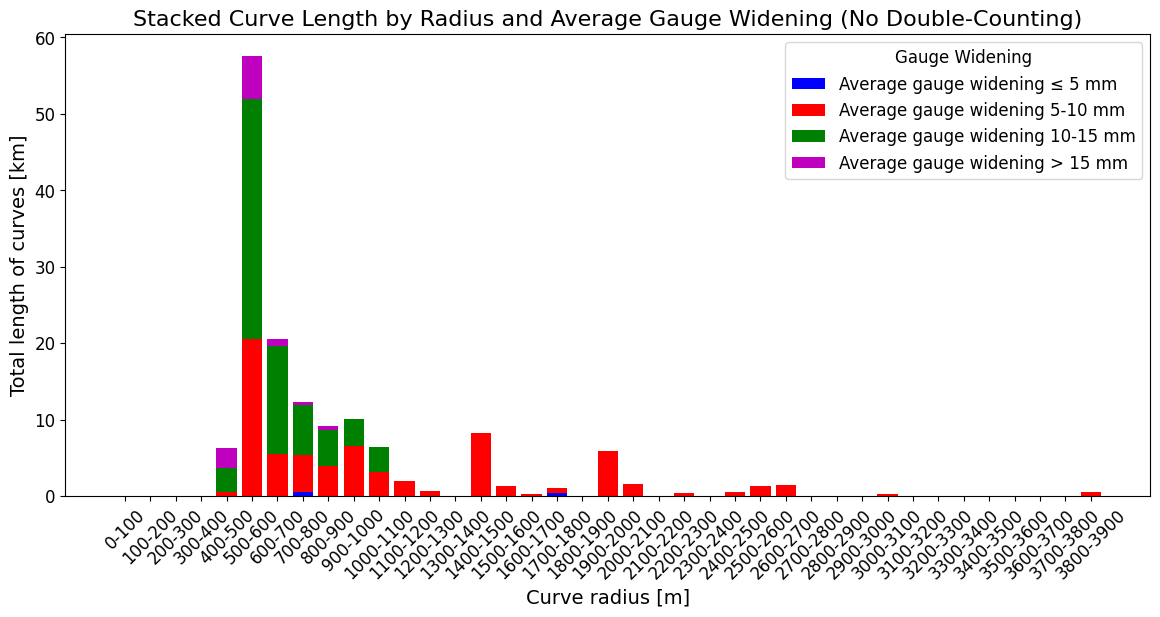

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming `df` is your DataFrame

# Step 1: Aggregate data by unique curves
df_agg = df.groupby(['Bandel', 'Startläge', 'Slutläge']).agg({
    'Radie_Abs_Value': 'first',  # Retain the first (unique for each curve)
    'length': 'first',  # Take the first length value (avoiding duplicates)
    'Medel Spårvidd Cirkulärkurva': 'mean'  # Average gauge widening for multiple observations
}).reset_index()

# Step 2: Convert length to kilometers
df_agg['length'] = df_agg['length'] / 1000  # Convert meters to kilometers

# Step 3: Define categories for `Radie` (Curve radius) with 100m increments
bins = np.arange(0, 4000, 100)  # Radius bins from 0 to 4000 in steps of 100
labels = [f'{bins[i]}-{bins[i + 1]}' for i in range(len(bins) - 1)]  # Create interval labels
df_agg['Radie Category'] = pd.cut(df_agg['Radie_Abs_Value'], bins=bins, labels=labels, right=False)

# Step 4: Define gauge widening categories based on `Medel Spårvidd Cirkulärkurva`
df_agg['Gauge Widening Category'] = pd.cut(
    df_agg['Medel Spårvidd Cirkulärkurva'],
    bins=[-np.inf, 5, 10, 15, np.inf],
    labels=['≤ 5 mm', '5-10 mm', '10-15 mm', '> 15 mm']
)

# Step 5: Group aggregated data by `Radie Category` and `Gauge Widening Category`, summing unique lengths
grouped = df_agg.groupby(['Radie Category', 'Gauge Widening Category'])['length'].sum().unstack(fill_value=0)

# Step 6: Prepare data for plotting
R_cat = np.arange(len(grouped.index))  # One bar per Radie Category
width = 0.8  # Bar width

# Convert the grouped DataFrame into a NumPy array for stacking
stack_data = grouped.values

# Step 7: Plot the stacked bar chart
plt.figure(figsize=(14, 6))
ax = plt.axes()

# Stacked bar plot
bottoms = np.zeros(len(R_cat))  # Initialize the bottom positions for stacking
categories = grouped.columns  # Gauge widening categories

# Colors for each category
colors = ['b', 'r', 'g', 'm']

for i, category in enumerate(categories):
    ax.bar(
        R_cat,
        stack_data[:, i],
        width=width,
        bottom=bottoms,
        color=colors[i],
        label=f'Average gauge widening {category}'
    )
    bottoms += stack_data[:, i]  # Update bottom for the next stack

# Step 8: Customize plot
plt.xticks(R_cat, grouped.index, rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Total length of curves [km]', fontsize=14)  # Updated label to km
plt.xlabel('Curve radius [m]', fontsize=14)
plt.legend(fontsize=12, title='Gauge Widening', title_fontsize=12)
plt.title('Stacked Curve Length by Radius and Average Gauge Widening (No Double-Counting)', fontsize=16)

# Optional: Save the figure
# plt.savefig('stacked_curve_length_plot.svg', bbox_inches='tight')

# Show the plot
plt.show()
